treatment of the meta data

In [1]:
#load the essential packages
import numpy as np
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import qiime2 as q2



In [2]:
data_dir = "../data/"

In [3]:
metadf = pd.read_csv('../data/metadata.tsv', sep='\t')

In [4]:
#get an overview of the data
metadf.head(5)

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0


In [5]:
#/
#I didn't get why we drop the host id here not for the whole data frame?
#which shows that there're no replicates in this dataframe
metadf_dr = metadf.drop_duplicates()

In [6]:
#and then check the results:
metadf_dr.shape[0]

1669

In [7]:
metadf.shape[0]

1669

In [8]:
#get the column names
metadf.columns.tolist()

['id',
 'Library Layout',
 'Instrument',
 'collection_date',
 'geo_location_name',
 'geo_latitude',
 'geo_longitude',
 'host_id',
 'age_days',
 'weight_kg',
 'length_cm',
 'WAZ',
 'HAZ',
 'WHZ',
 'BMI',
 'birth_weight_g',
 'birth_length_cm',
 'sex',
 'delivery_mode',
 'zygosity',
 'race',
 'ethnicity',
 'delivery_preterm',
 'diet_milk',
 'diet_weaning',
 'age_months']

In [12]:
#here do some checkings
#1. collecting time 
#get the collecting date info
#metadf['collection_date'].sort_values().unique()


In [15]:
#date_mdf = metadf.sort_values(by = ['collection_date'])


In [13]:
#date_mdf

In [14]:
#date_mdf['host_id'].value_counts()#all the samples are unique, sample only for once

In [24]:
metadf_diet_age = metadf[['age_months','diet_milk']]

In [19]:
metadf_diet_age.head(5)

,age_months,diet_milk,diet_weaning
0,8.0,fd,True
1,6.0,fd,True
2,18.0,NaN,NaN
3,18.0,NaN,NaN
4,23.0,NaN,NaN


In [25]:
metadf_diet_age = metadf_diet_age.sort_values(by = ['age_months'])#order as the age

In [31]:
metadf_diet_age[['number']] = 1

In [33]:
countdf = metadf_diet_age.groupby(['age_months','diet_milk'])['number'].sum().reset_index()
#metadf_fiet_age.pivot_table(index=['age_months'],columns=['diet_milk'],values='销售量').reset_index()
#change it into the long table


In [34]:
countdf = countdf.pivot_table(index = ['age_months'], columns = ['diet_milk'], values = 'number').reset_index()

<AxesSubplot:title={'center':'Distribution of diet methods'}, xlabel='age_months'>

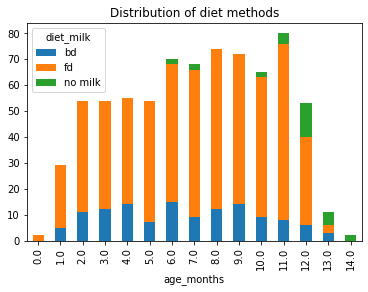

In [37]:
countdf.plot(x='age_months',
        kind='bar',
        stacked=True,
        title='Distribution of diet methods')

In [ ]:
#now here is for the diet_weaning
